In [2]:
pip install tensorflow==2.0

Note: you may need to restart the kernel to use updated packages.


In [4]:
import tensorflow as tf

In [5]:
print(tf.__version__)

2.0.0


In [6]:
from sklearn.datasets import load_breast_cancer

In [7]:
dataset=load_breast_cancer()

In [8]:
type(dataset)

sklearn.utils.Bunch

In [9]:
#note that it is a bunch object
#bunch objects actually acts like dictioanry where you can treat keys like attributes
dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [10]:
dataset.data.shape

(569, 30)

In [ ]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [11]:
dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

In [12]:
dataset.target.shape

(569,)

In [13]:
dataset.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [14]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(dataset.data,dataset.target,test_size=0.3)

In [15]:
N,D=X_train.shape

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [17]:

model=tf.keras.models.Sequential([
            tf.keras.layers.Input(shape=(D,)),
            tf.keras.layers.Dense(1,activation='sigmoid')
])

In [18]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
              )

In [19]:
r=model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100)

Train on 398 samples, validate on 171 samples
Epoch 1/100
398/398 [==============================] - 1s 3ms/sample - loss: 1.1973 - accuracy: 0.3769 - val_loss: 1.2739 - val_accuracy: 0.3509
Epoch 2/100
398/398 [==============================] - 0s 123us/sample - loss: 1.0790 - accuracy: 0.4397 - val_loss: 1.1456 - val_accuracy: 0.4211
Epoch 3/100
398/398 [==============================] - 0s 171us/sample - loss: 0.9747 - accuracy: 0.4774 - val_loss: 1.0252 - val_accuracy: 0.4444
Epoch 4/100
398/398 [==============================] - 0s 208us/sample - loss: 0.8815 - accuracy: 0.5000 - val_loss: 0.9173 - val_accuracy: 0.4737
Epoch 5/100
398/398 [==============================] - 0s 218us/sample - loss: 0.7983 - accuracy: 0.5553 - val_loss: 0.8241 - val_accuracy: 0.5088
Epoch 6/100
398/398 [==============================] - 0s 226us/sample - loss: 0.7270 - accuracy: 0.6005 - val_loss: 0.7410 - val_accuracy: 0.5789
Epoch 7/100
398/398 [==============================] - 0s 188us/sample - l

In [20]:
print("train_score: ",model.evaluate(X_train,Y_train))
print("test score : ", model.evaluate(X_test,Y_test))

398/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

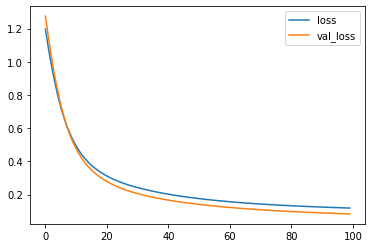

In [21]:
import matplotlib.pyplot as plt
# training loss = loss
# validation loss = val_loss
plt.plot(r.history["loss"],label="loss")
plt.plot(r.history['val_loss'],label="val_loss")
plt.legend()

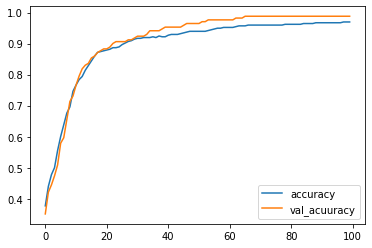

In [22]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_acuuracy')
plt.legend()